In [1]:
import pandas as pd
import geopandas as gpd # For loading the map of road segments
from shapely.geometry import Point, Polygon
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

In [2]:
# Load the data
data_train = pd.read_csv('../Data/Train.csv', parse_dates=['datetime'])
data_train.head()

,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382


In [3]:
data_weather = pd.read_csv('../Data/Weather_Nairobi_Daily_GFS.csv', parse_dates=['Date'])
data_weather.head()

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459
2,2018-01-03,30.246618,86.599998,0.011930,15.838525,-0.282732,-0.653965
3,2018-01-04,33.010689,90.900002,0.012780,16.169244,0.211572,0.908123
4,2018-01-05,27.250372,82.413353,0.011392,15.923456,1.047275,-0.037742


In [4]:
data_weather["year_month"] = data_weather["Date"].dt.strftime('%Y-%m')

In [5]:
data_weather = data_weather.loc[data_weather["Date"].dt.date < datetime.date(2019, 1, 1)]

In [6]:
df_prec_water_mean = pd.DataFrame(columns=['Month Year', 'Mean precipitable water'])
list_month_year = []
list_mean_prec_water = []
for year_month in data_weather['year_month'].unique():
    list_month_year.append(year_month)
    list_mean_prec_water.append(data_weather.loc[data_weather['year_month'] == year_month]['precipitable_water_entire_atmosphere'].mean())
df_prec_water_mean['Month Year'] = list_month_year
df_prec_water_mean['Mean precipitable water'] = list_mean_prec_water

### Plot precipitation per date

C:\ProgramData\Miniconda3\envs\tensorflow_env\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


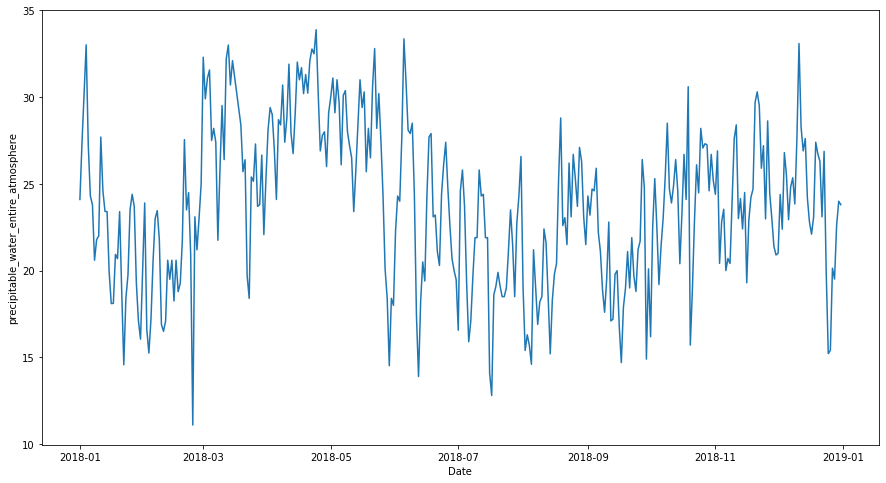

In [7]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data_weather, x="Date", y="precipitable_water_entire_atmosphere")

### Ploting data_train per month

In [12]:
#Consider only data on 2018
data_train = data_train.loc[data_train["datetime"].dt.year < 2019]

In [13]:
data_train['Month'] = data_train['datetime'].dt.month_name()

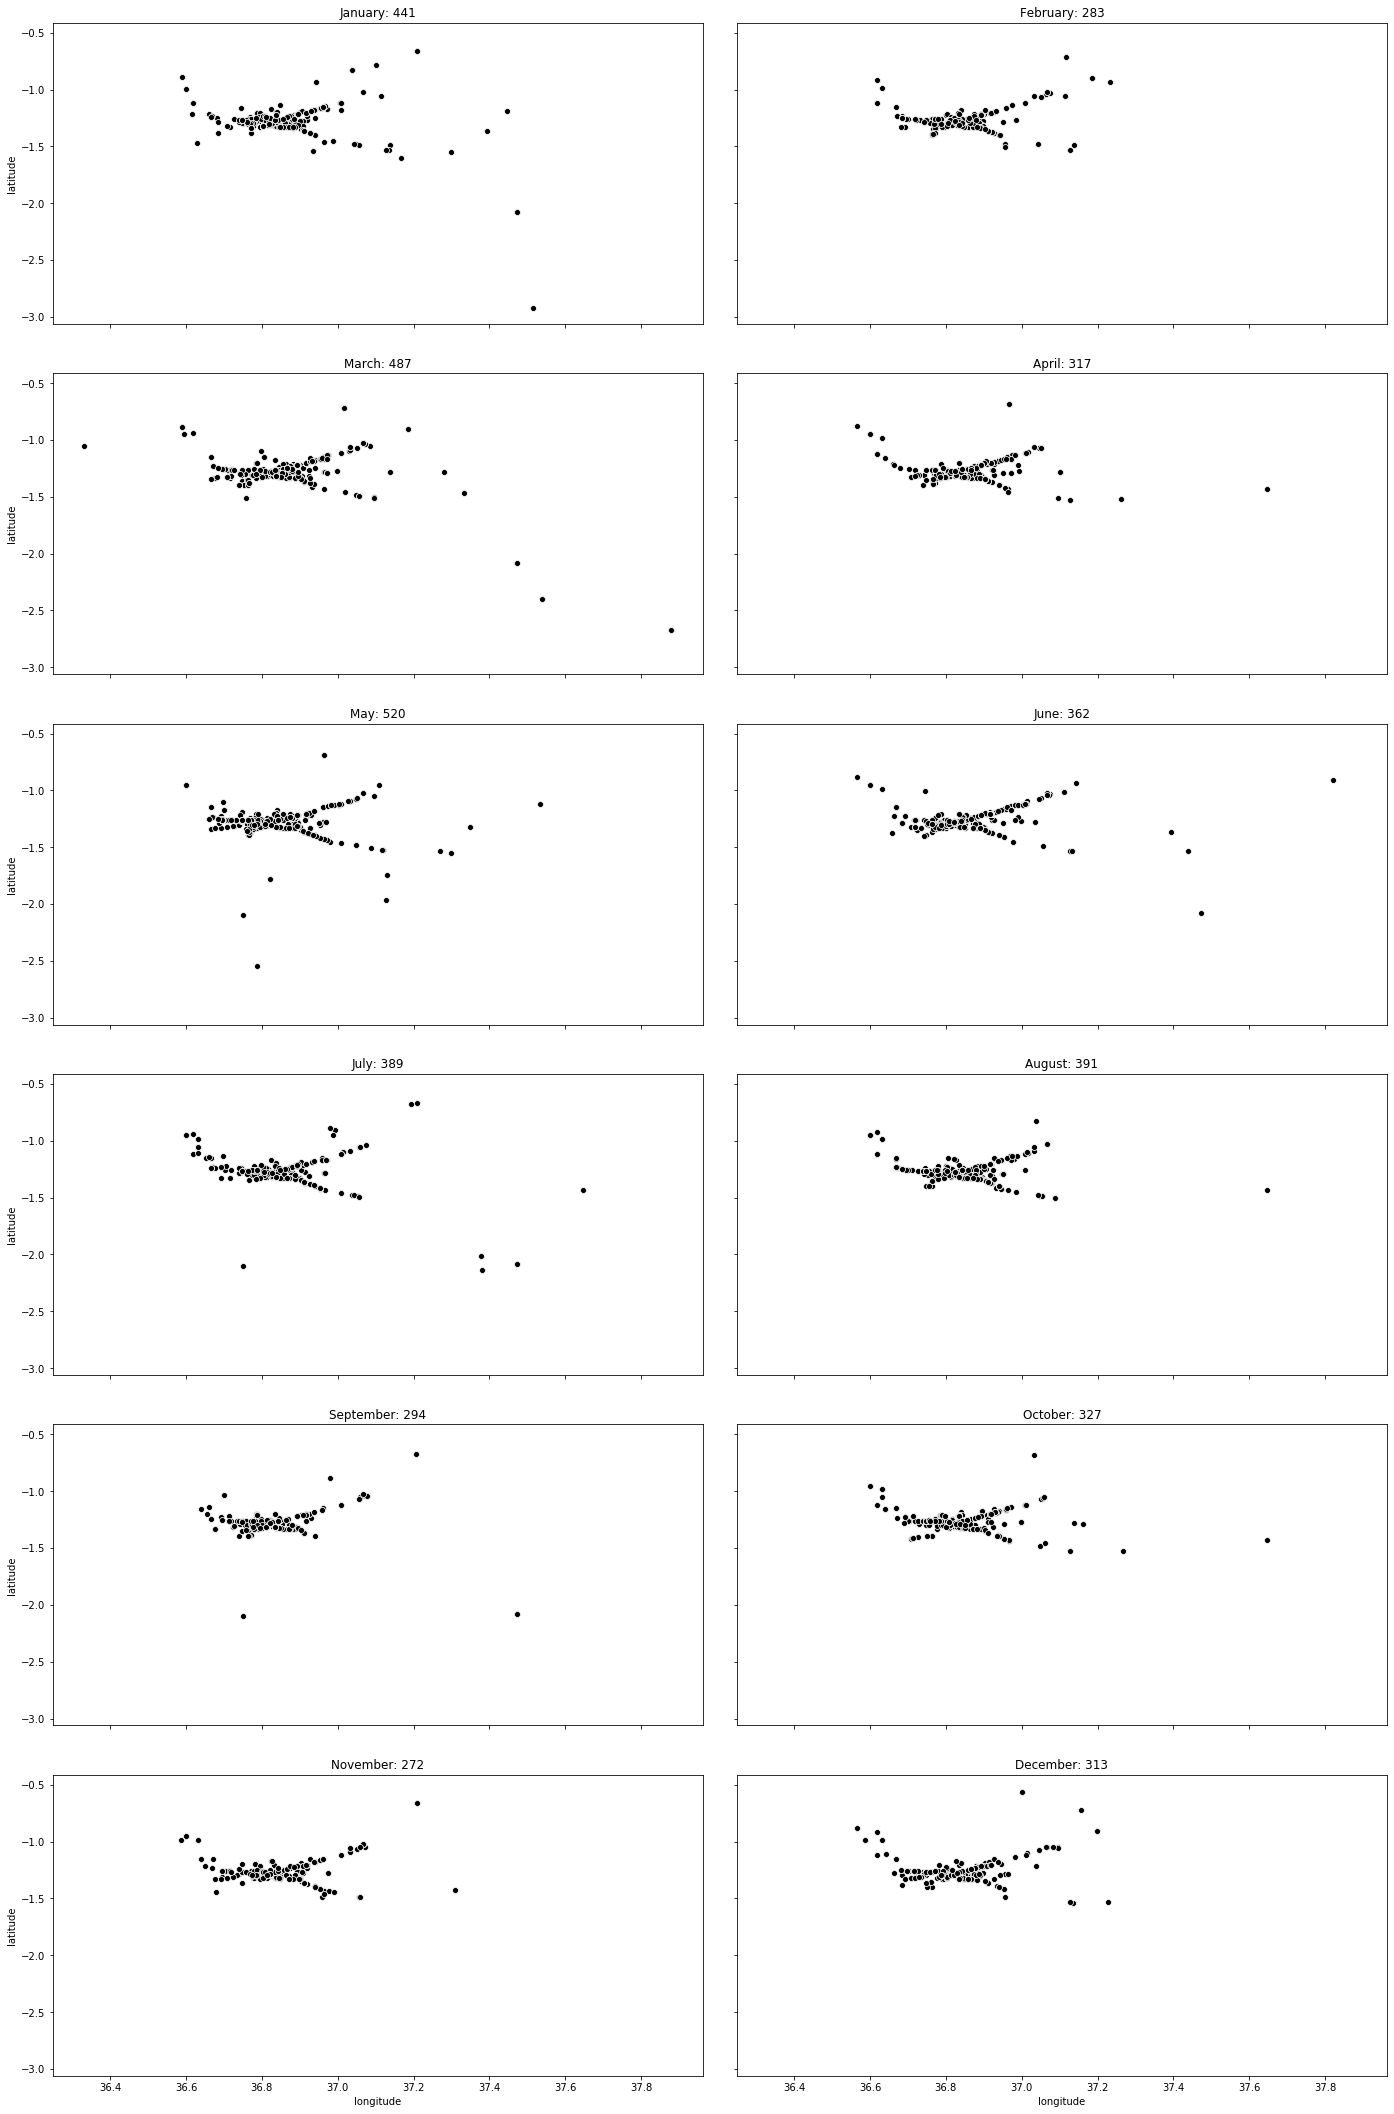

In [14]:
dict_crash_per_month = {}
f, axes = plt.subplots(6, 2, figsize=(20, 30), sharex=True, sharey=True)
i, j = 0, 0
for month in data_train["Month"].unique():
    data_for_month = data_train.loc[data_train["Month"] == month]
    sns.scatterplot(data=data_for_month, x='longitude', y='latitude', color='black', ax=axes[i, j]).set_title(str(month) + ": " + str(len(data_for_month)))
    j += 1
    if j==2:
        i+=1
        j=0
f.tight_layout(pad=3.0)